In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.layers import Convolution2D,Dropout,Flatten,MaxPooling2D,Conv2D,LeakyReLU
from keras.regularizers import l2

In [8]:
#download the dataset 
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [10]:
#Find the labels 
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [11]:
#convert the labels into one hot encoding 
y_test =to_categorical(y_test)
y_train =to_categorical(y_train)
print(y_test[0])
print(y_test[1])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


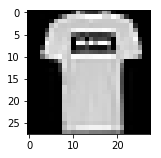

In [12]:
plt.figure(figsize=[10,5])
plt.subplot(2,2,1)
plt.imshow(X_train[1],cmap='gray')
plt.show()

In [13]:
X_train= X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)
print(X_train.shape)


(60000, 28, 28, 1)


In [14]:
print(X_test.shape)

(10000, 28, 28, 1)


In [15]:
X_train.dtype

dtype('uint8')

In [16]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train=X_train/255
X_test=X_test/255

In [17]:
X_train.shape

(60000, 28, 28, 1)

In [18]:
#model1 
batch_size = 64
epochs = 20
num_classes = 10

In [19]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(10, activation='softmax'))

In [20]:
#Using drop out 
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', kernel_regularizer=l2(0.01), input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32, (5, 5), kernel_regularizer=l2(0.01),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(0.01),activation='relu'))
model.add(Conv2D(64, (5, 5), kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [21]:
#model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
fashion_model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])


In [35]:
fashion_train=fashion_model.fit(X_train, y_train,batch_size=2000,epochs=5,validation_data=(X_test, y_test),shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 134s 2ms/step - loss: 0.2248 - acc: 0.9182 - val_loss: 0.2657 - val_acc: 0.9014
Epoch 2/5
60000/60000 [==============================] - 127s 2ms/step - loss: 0.2156 - acc: 0.9222 - val_loss: 0.2596 - val_acc: 0.9065
Epoch 3/5
60000/60000 [==============================] - 126s 2ms/step - loss: 0.2110 - acc: 0.9234 - val_loss: 0.2686 - val_acc: 0.9001
Epoch 4/5
60000/60000 [==============================] - 130s 2ms/step - loss: 0.2092 - acc: 0.9243 - val_loss: 0.2598 - val_acc: 0.9066
Epoch 5/5
60000/60000 [==============================] - 126s 2ms/step - loss: 0.2012 - acc: 0.9273 - val_loss: 0.2605 - val_acc: 0.9054


In [36]:
test_eval = fashion_model.evaluate(X_test, y_test, verbose=0)

In [37]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.260470436501503
Test accuracy: 0.9054


In [38]:
fashionmnist_savemodel= fashion_model.save("fashionmnist.h5py")

Text(0.5, 1.0, 'Training and validation loss')

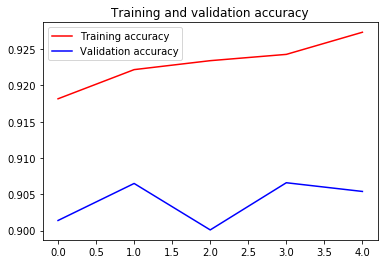

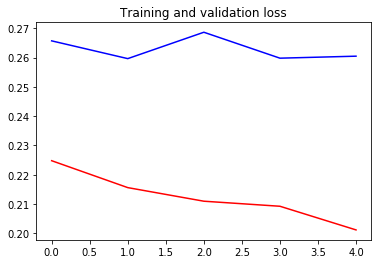

In [39]:
accuracy = fashion_train.history['acc']
val_accuracy = fashion_train.history['val_acc']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

In [66]:
predicted_classes = fashion_model.predict(X_test)

In [68]:
predicted_classes1 = np.argmax(np.round(predicted_classes),axis=1)
y_test=np.argmax(np.round(y_test),axis=1)
print(predicted_classes1[2])
print(y_test[0])

AxisError: axis 1 is out of bounds for array of dimension 1

In [60]:
y_test=np.argmax(y_test)


Found 984 correct labels


IndexError: invalid index to scalar variable.

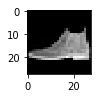

In [67]:
correct = np.where(predicted_classes1==y_test)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes1[correct], y_test[correct]))
    plt.tight_layout()

In [44]:
incorrect = np.where(predicted_classes!=y_test)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.tight_layout()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


IndexError: tuple index out of range

In [48]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets